In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz import trees 
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.shadow import ShadowDecTree
# from dtreeviz.shadow2 import ShadowDecTree2
from dtreeviz.models.shadow_decision_tree import ShadowDecTree3
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import treeviz
from dtreeviz import trees

# Classifier

In [5]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## Initialize shadow tree

In [61]:
sk_dtree = ShadowSKDTree(tree_classifier, dataset[features], dataset[target], features, target, [0, 1])

## Visualizations

### viz_leaf_samples

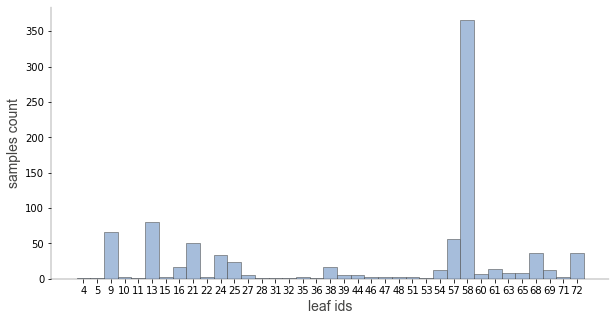

In [15]:
treeviz.viz_leaf_samples(tree_classifier, dataset[features], features)

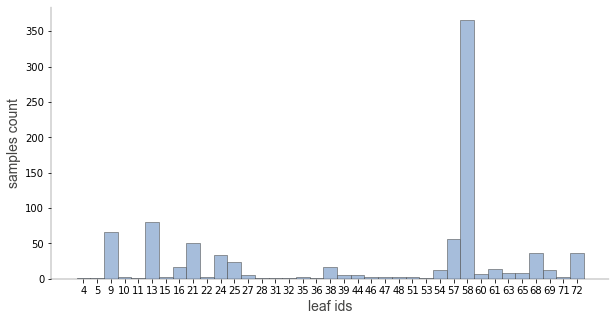

In [17]:
treeviz.viz_leaf_samples(sk_dtree)

### ctreeviz_leaf_samples

In [19]:
help(treeviz.ctreeviz_leaf_samples)

Help on function ctreeviz_leaf_samples in module dtreeviz.treeviz:

ctreeviz_leaf_samples(tree_model, x_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None, y_data: (<class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>) = None, feature_names: List[str] = None, target_name: str = None, class_names: (typing.Mapping[numbers.Number, str], typing.List[str]) = None, tree_index: int = None, figsize: tuple = (10, 5), display_type: str = 'plot', plot_ylim: int = None, colors: dict = None, fontsize: int = 14, fontname: str = 'Arial', grid: bool = False)
    Visualize the number of training samples by class from each leaf.
    
    It's a good way to see how training classes are distributed in leaves. For example, you can observe that in some
    leaves all the samples belong only to one class, or that in other leaves the distribution of classes is almost
    50/50.
    You could get all the samples from these leaves and look over them/understand what they have

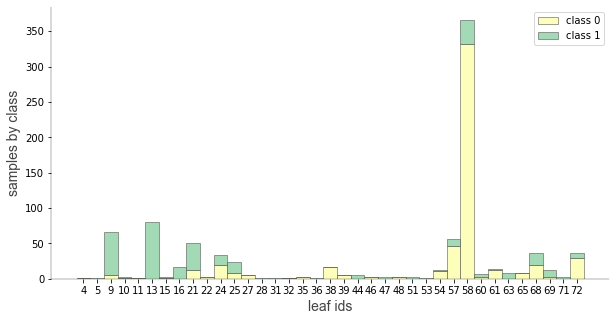

In [26]:
treeviz.ctreeviz_leaf_samples(tree_classifier, dataset[features], dataset[target], features)

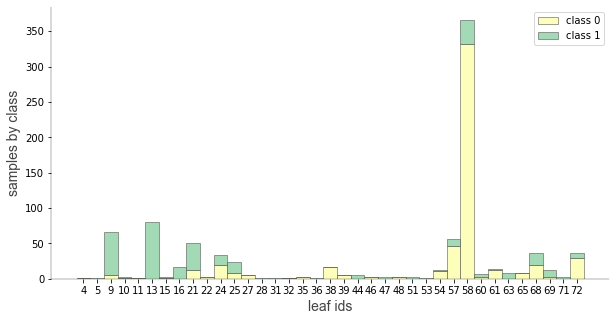

In [27]:
treeviz.ctreeviz_leaf_samples(sk_dtree)

### dtreeviz

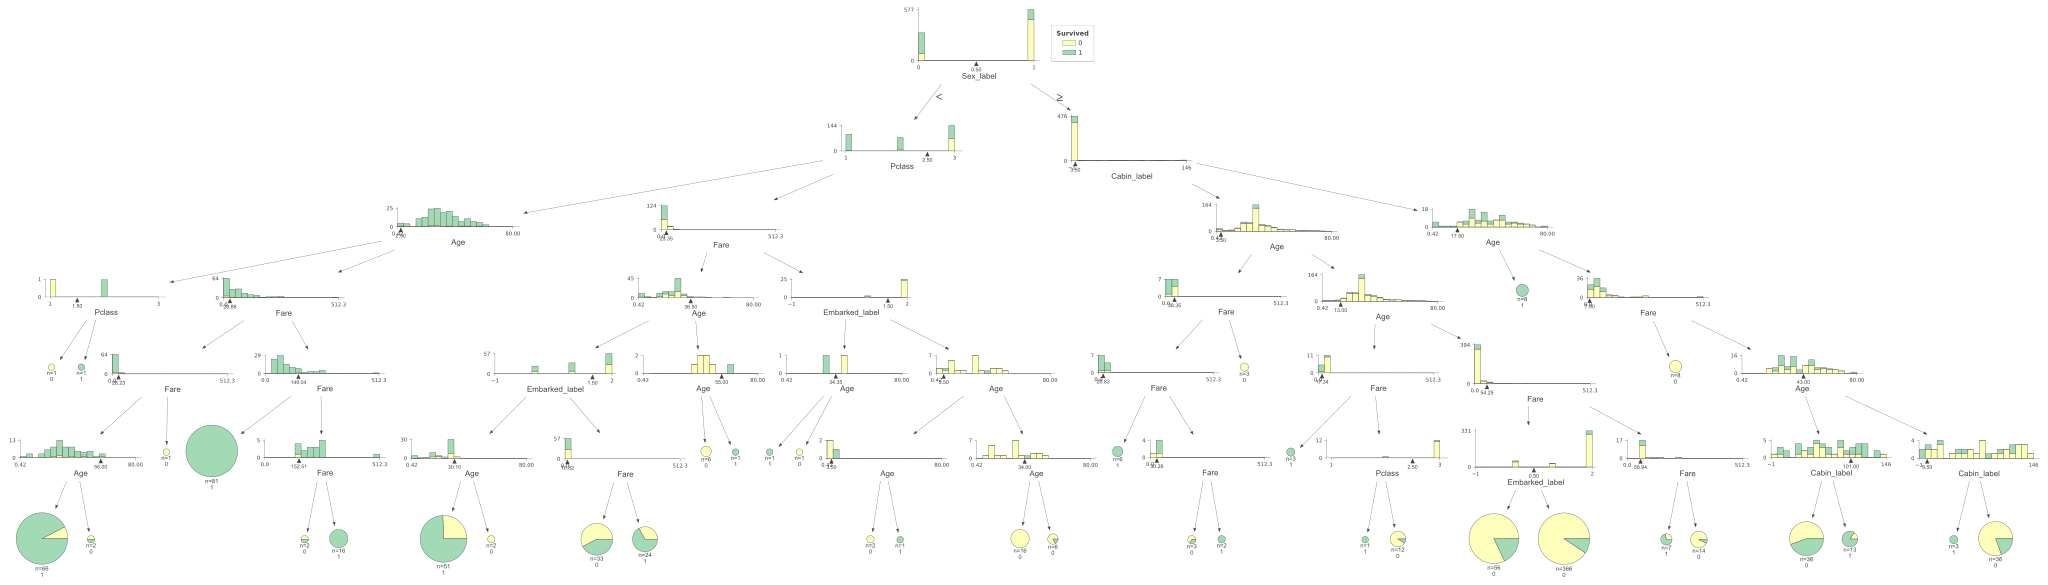

In [32]:
treeviz.dtreeviz(tree_classifier, dataset[features], dataset[target], features, target, class_names=[0, 1])

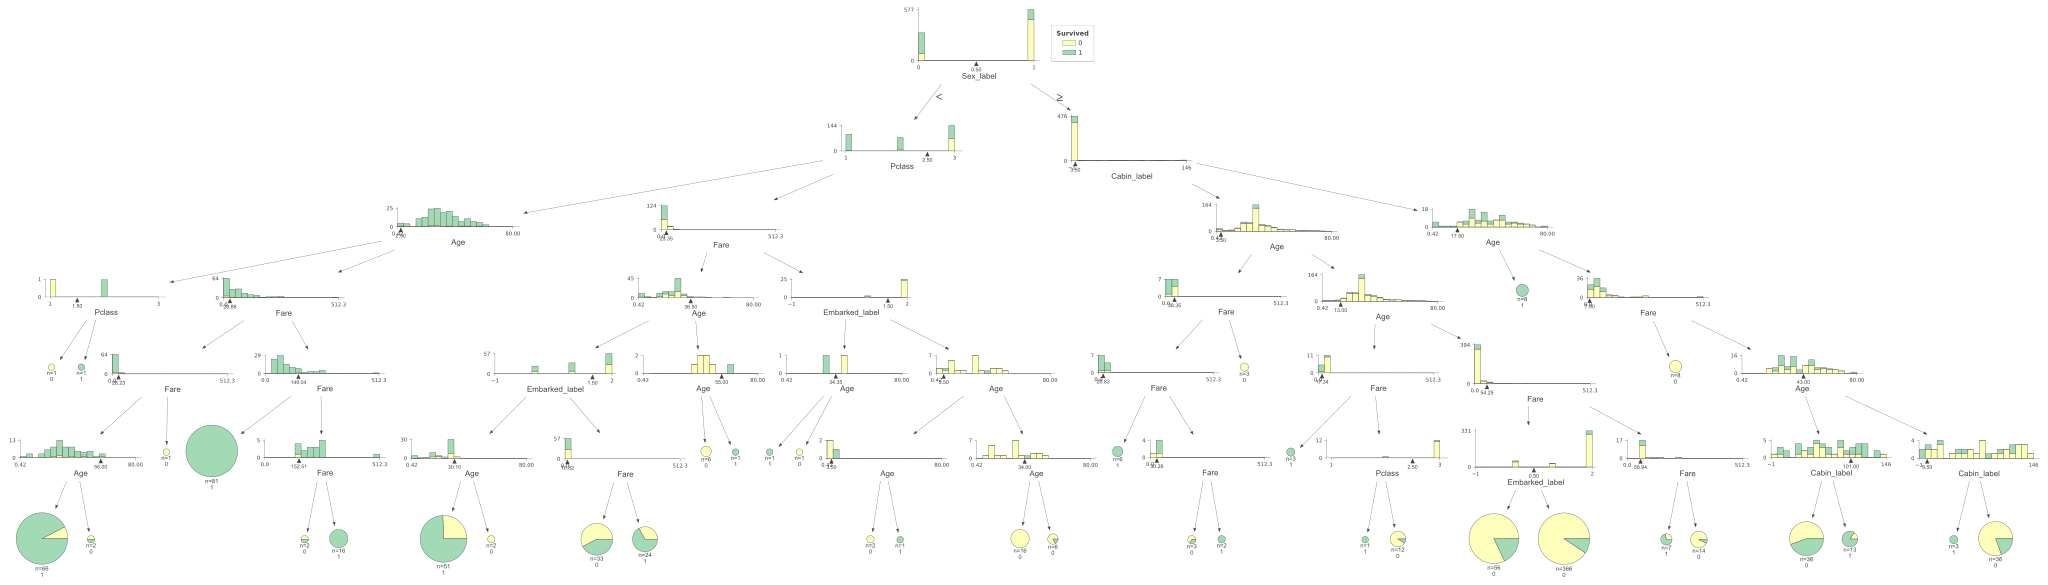

In [33]:
treeviz.dtreeviz(sk_dtree, fancy=True)

#### show just path

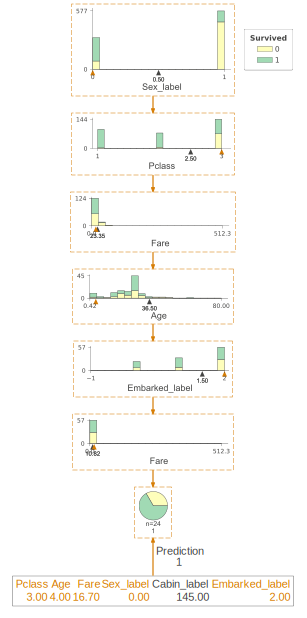

In [34]:
treeviz.dtreeviz(sk_dtree, show_just_path=True, X = dataset[features].iloc[10])

### viz_leaf_criterion

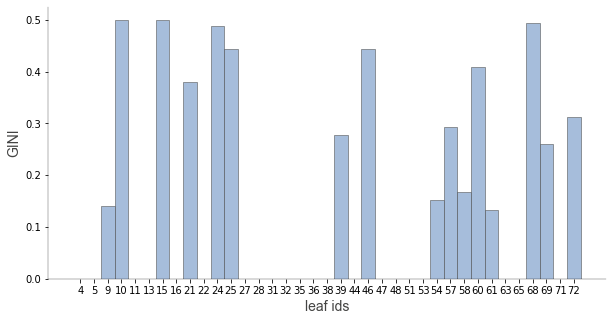

In [38]:
treeviz.viz_leaf_criterion(tree_classifier)

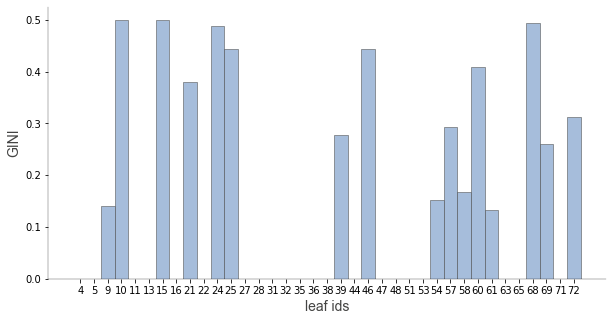

In [39]:
treeviz.viz_leaf_criterion(sk_dtree)

### describe_node_sample

In [58]:
treeviz.describe_node_sample(tree_classifier, 1, dataset[features], feature_names=features)



Pclass         Age        Fare  Sex_label  Cabin_label  \
count  314.000000  314.000000  314.000000      314.0   314.000000   
mean     2.159236   28.216730   44.479818        0.0    23.745223   
std      0.857290   12.877543   57.997698        0.0    43.225526   
min      1.000000    0.750000    6.750000        0.0    -1.000000   
25%      1.000000   21.000000   12.071875        0.0    -1.000000   
50%      2.000000   29.699118   23.000000        0.0    -1.000000   
75%      3.000000   35.000000   55.000000        0.0    35.750000   
max      3.000000   63.000000  512.329200        0.0   145.000000   

       Embarked_label  
count      314.000000  
mean         1.401274  
std          0.863605  
min         -1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

In [67]:
treeviz.describe_node_sample(sk_dtree, node_id=10)

Pclass        Age       Fare  Sex_label  Cabin_label  Embarked_label
count  2.000000   2.000000   2.000000        2.0      2.00000             2.0
mean   1.500000  57.500000  18.525000        0.0     92.50000             2.0
std    0.707107   0.707107  11.349064        0.0     61.51829             0.0
min    1.000000  57.000000  10.500000        0.0     49.00000             2.0
25%    1.250000  57.250000  14.512500        0.0     70.75000             2.0
50%    1.500000  57.500000  18.525000        0.0     92.50000             2.0
75%    1.750000  57.750000  22.537500        0.0    114.25000             2.0
max    2.000000  58.000000  26.550000        0.0    136.00000             2.0

### explain_prediction_path

In [56]:
X = dataset[features].iloc[5]
X

Pclass             3.000000
Age               29.699118
Fare               8.458300
Sex_label          1.000000
Cabin_label       -1.000000
Embarked_label     1.000000
Name: 5, dtype: float64

In [58]:
treeviz.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english")

13.0 <= Age 
Fare < 54.25
0.5 <= Sex_label 
Cabin_label < 3.5
0.5 <= Embarked_label 


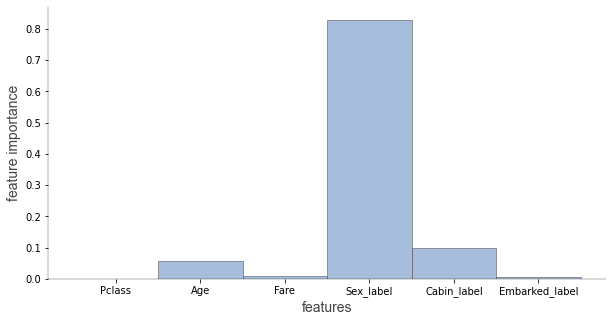

In [59]:
treeviz.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")

In [62]:
treeviz.explain_prediction_path(sk_dtree, dataset[features].iloc[5], explanation_type="plain_english")

13.0 <= Age 
Fare < 54.25
0.5 <= Sex_label 
Cabin_label < 3.5
0.5 <= Embarked_label 


# Regressor

In [6]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [7]:
sk_dtree_reg = ShadowSKDTree(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

## Visualizations

### dtreeviz

In [8]:
from sklearn import tree

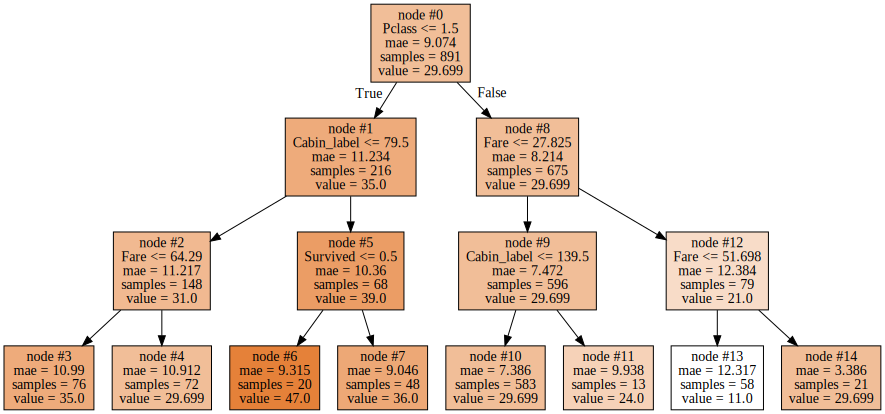

In [10]:
dot_data = tree.export_graphviz(tree_regressor, out_file=None, feature_names=features_reg,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

In [12]:
leaf_index = 0 
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].median())
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].mean())

35.0
39.86556888544891


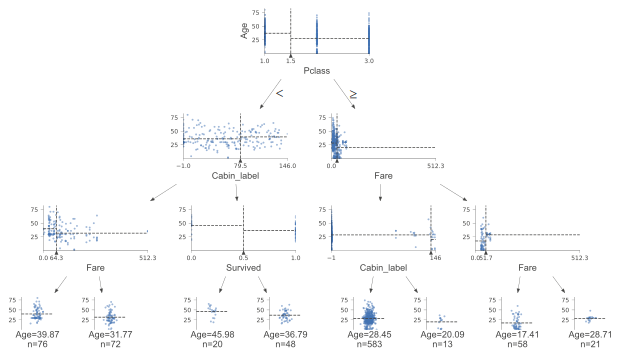

In [14]:
treeviz.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

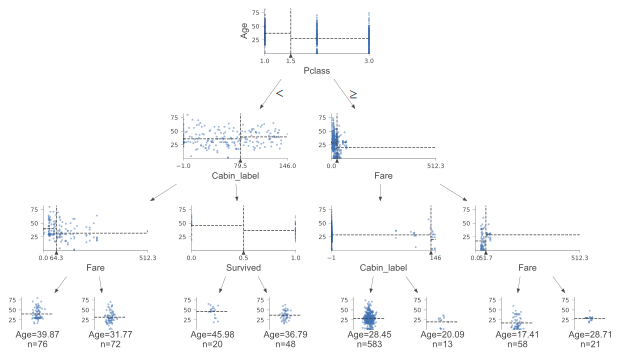

In [15]:
treeviz.dtreeviz(sk_dtree_reg)

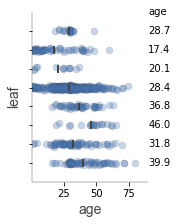

In [16]:
treeviz.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

#### show just path

In [55]:
[node.id for node in sk_dtree_reg.leaves], [node.prediction() for node in sk_dtree_reg.leaves]

([3, 4, 6, 7, 10, 11, 13, 14],
 [35.0,
  29.69911764705882,
  47.0,
  36.0,
  29.69911764705882,
  24.0,
  11.0,
  29.69911764705882])

In [58]:
[node.split() for node in sk_dtree_reg.internal]

[64.28959846496582,
 0.5,
 79.5,
 139.5,
 51.69790077209473,
 27.824999809265137,
 1.5]

In [40]:
dataset[features_reg].iloc[10]

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

v : 139.5
v : 27.824999809265137
v : 1.5
v : 20.092239819004526
path ['Pclass', 'Fare', 'Cabin_label', 'Embarked_label']
path id [0, 8, 9, 11]
path prediction [None, None, None, 24.0]
v : 24.0
v : 3.0
v : 16.7
v : 0.0
v : 145.0
v : 2.0
v : 1.0


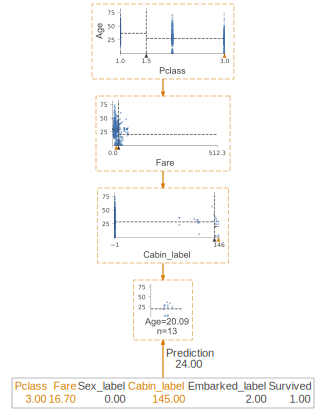

In [54]:
treeviz.dtreeviz(sk_dtree_reg, show_just_path=True, X = dataset[features_reg].iloc[10])

### viz_leaf_samples

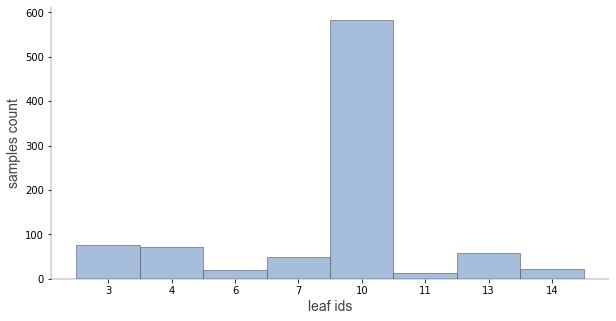

In [19]:
treeviz.viz_leaf_samples(tree_regressor, dataset[features_reg], features_reg)

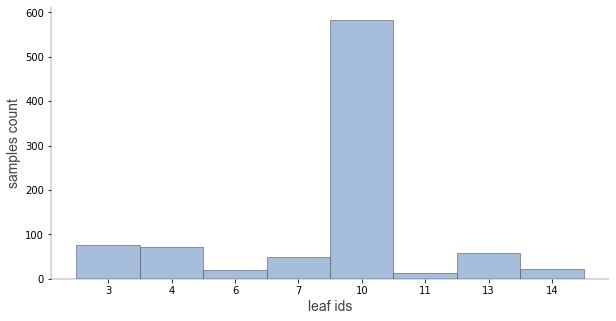

In [20]:
treeviz.viz_leaf_samples(sk_dtree_reg)

### viz_leaf_criterion

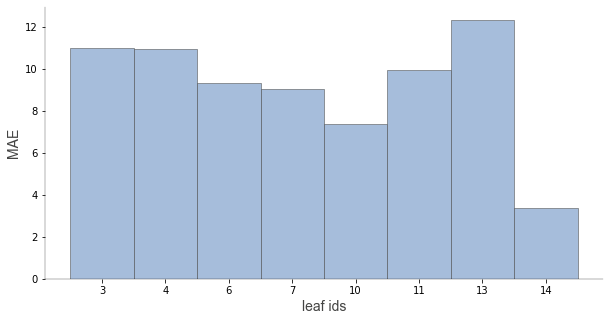

In [30]:
treeviz.viz_leaf_criterion(tree_regressor)

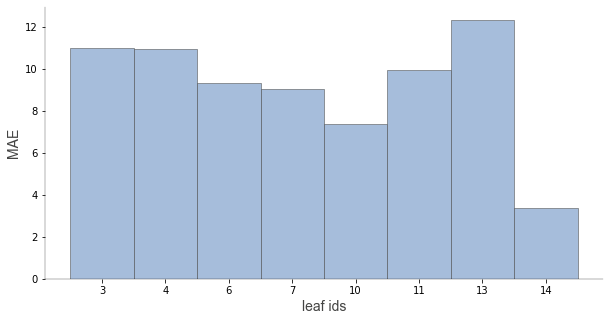

In [31]:
treeviz.viz_leaf_criterion(sk_dtree_reg)

### viz_leaf_target

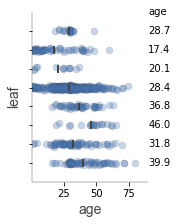

In [38]:
treeviz.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

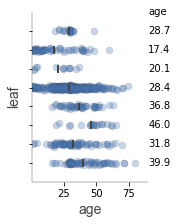

In [39]:
treeviz.viz_leaf_target(sk_dtree_reg)

### describe_node_sample

In [88]:
treeviz.describe_node_sample(tree_regressor, node_id=1, x_data=dataset[features], feature_names=features_reg)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   37.048118   84.154687     0.564815       54.773148    1.175926
std       0.0   14.046369   78.380373     0.496933       43.781906    0.996073
min       1.0    0.920000    0.000000     0.000000       -1.000000   -1.000000
25%       1.0   29.000000   30.923950     0.000000       13.750000    0.000000
50%       1.0   35.000000   60.287500     1.000000       53.500000    2.000000
75%       1.0   47.250000   93.500000     1.000000       91.250000    2.000000
max       1.0   80.000000  512.329200     1.000000      146.000000    2.000000

In [66]:
treeviz.describe_node_sample(sk_dtree_reg, node_id=1)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   84.154687    0.564815    54.773148        1.175926    0.629630
std       0.0   78.380373    0.496933    43.781906        0.996073    0.484026
min       1.0    0.000000    0.000000    -1.000000       -1.000000    0.000000
25%       1.0   30.923950    0.000000    13.750000        0.000000    0.000000
50%       1.0   60.287500    1.000000    53.500000        2.000000    1.000000
75%       1.0   93.500000    1.000000    91.250000        2.000000    1.000000
max       1.0  512.329200    1.000000   146.000000        2.000000    1.000000

### explain_prediction_path

In [68]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [69]:
treeviz.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


In [72]:
treeviz.explain_prediction_path(sk_dtree_reg, X_reg, "plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


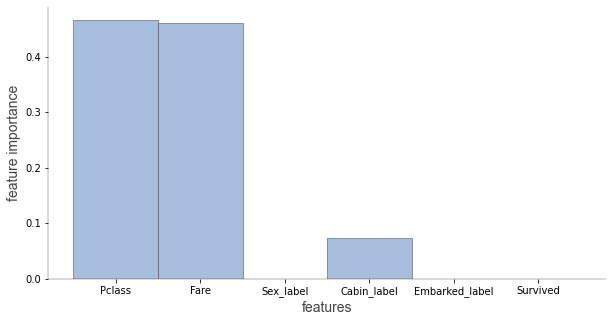

In [75]:
treeviz.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="sklearn_default")

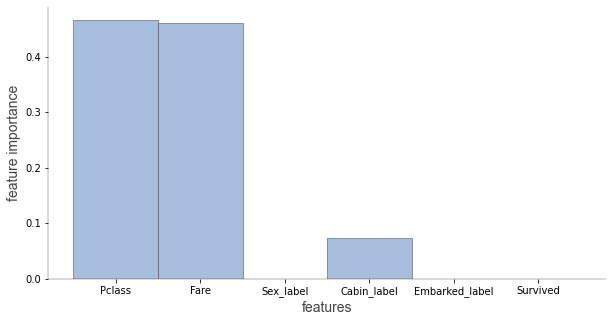

In [125]:
treeviz.explain_prediction_path(sk_dtree_reg, X_reg, "sklearn_default")

### rtreeviz_univar

In [76]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="mae")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [77]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)

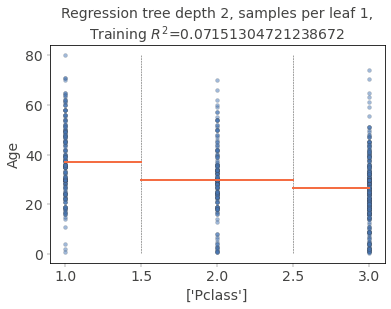

In [78]:
treeviz.rtreeviz_univar(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


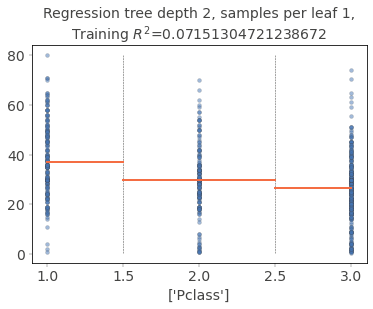

In [79]:
treeviz.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [80]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [81]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

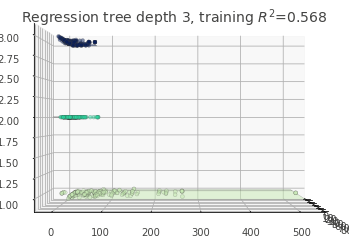

In [82]:
treeviz.rtreeviz_bivar_3D(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)


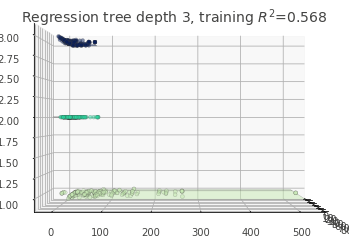

In [83]:
treeviz.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [84]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [85]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

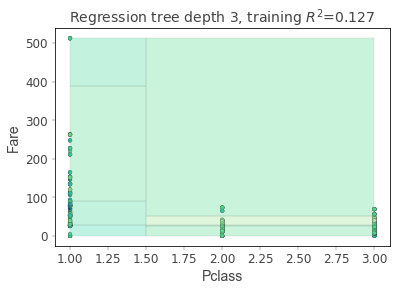

In [86]:
treeviz.rtreeviz_bivar_heatmap(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

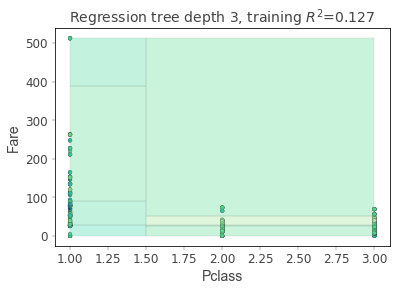

In [87]:
treeviz.rtreeviz_bivar_heatmap(skdtree_bivar)